1. pre-process the data by scaling/standardizing the 8 columns

# Understand the problem and read in the data

This Kaggle challenge is about predicting the onset of diabetes in 5 years or less. 
Target variable is Outcome. 1 = yes, the person became diabetic in 5 years, and 0 = No, 
the person did not. This is a binary classification problem. Please check out the Kaggle
link here to see feature 
details - https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

In [24]:
'''Import necessary packages'''
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer

%matplotlib inline

In [2]:
# Load Data from Google Drive
drive.mount('/content/drive')
data = open('/content/drive/MyDrive/dataset_INFO6105/pima-indians-diabetes.data')

Mounted at /content/drive


In [3]:
df = pd.read_csv(data,header = None)
print(df.shape)
df.head(2)

(768, 9)


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


# Pre-process data, train-test split

In [6]:
#Separate out X and Y

X = df.iloc[:, :8]
Y = df.iloc[:, 8:9]

#### Various other preprocessing techniques which I've commented. I've just used the MinMaxScaler for the implementation

1. MinMaxScaler
2. Normalizer
3. Binarizer
4. StandardScaler

In [ ]:
# #StandardScaler
# transforms = StandardScaler()
# standardScale_X = transforms.fit_transform(X)
# print(standardScale_X)

# transforms = Normalizer()
# normalizer_x = transforms.fit_transform(X)
# print(normalizer_x)

# transforms = Binarizer(threshold=0.5)
# binarizer_x = transforms.fit_transform(X)
# print(binarizer_x)

In [7]:
#scale Features from 0 to 1
transforms = MinMaxScaler(feature_range=(0,1))
scaler_X =  transforms.fit_transform(X)
print(scaler_X)

[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]


#### Split data into train, validation and test

In [8]:
df.shape

(768, 9)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(scaler_X, Y, test_size=0.15, random_state=1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=1)

In [15]:
print(X_train.shape,Y_train.shape,X_val.shape,Y_val.shape,X_test.shape,Y_test.shape)

(554, 8) (554, 1) (98, 8) (98, 1) (116, 8) (116, 1)


In [16]:
# # Train- Test Split
# (X_train, X_test, Y_train, Y_test) = train_test_split(scaler_X, Y, test_size=0.33, random_state=1)
# print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

# Build and compile a deep learning model

In [18]:
# Build the deep neural network
model = Sequential()
model.add(Dense(10, input_dim=8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
# Compile the DNN

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# Fit the DNN with your train data

history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=5)

Epoch 1/100
111/111 [==============================] - 1s 5ms/step - loss: 0.4428 - accuracy: 0.7671 - val_loss: 0.4505 - val_accuracy: 0.7755
Epoch 2/100
111/111 [==============================] - 0s 4ms/step - loss: 0.4441 - accuracy: 0.7852 - val_loss: 0.4491 - val_accuracy: 0.7857
Epoch 3/100
111/111 [==============================] - 1s 5ms/step - loss: 0.4445 - accuracy: 0.7708 - val_loss: 0.4491 - val_accuracy: 0.7755
Epoch 4/100
111/111 [==============================] - 1s 7ms/step - loss: 0.4400 - accuracy: 0.7870 - val_loss: 0.4494 - val_accuracy: 0.7857
Epoch 5/100
111/111 [==============================] - 1s 6ms/step - loss: 0.4445 - accuracy: 0.7780 - val_loss: 0.4546 - val_accuracy: 0.8061
Epoch 6/100
111/111 [==============================] - 0s 4ms/step - loss: 0.4412 - accuracy: 0.7870 - val_loss: 0.4508 - val_accuracy: 0.7755
Epoch 7/100
111/111 [==============================] - 0s 4ms/step - loss: 0.4431 - accuracy: 0.7744 - val_loss: 0.4497 - val_accuracy: 0.7755

#### Epoch vs Train/ Validation 

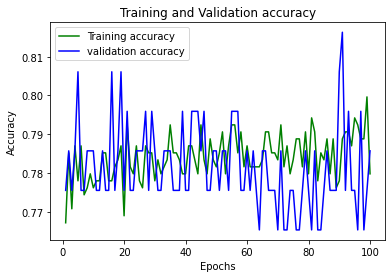

In [29]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
# Evaluate the model
scores = model.evaluate(X_test, Y_test)
print ("Accuracy: %.2f%%" %(scores[1]*100))

4/4 [==============================] - 0s 3ms/step - loss: 0.4837 - accuracy: 0.7759
Accuracy: 77.59%
